In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.misc
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet169
from keras.applications import imagenet_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BIWH = 5000
CIWH = 50
NI = int(BIWH/CIWH)*int(BIWH/CIWH)
print("NI: ", NI)

NI:  4489


In [ ]:
def prepare_image(image, target, mode):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image, mode=mode)

    # return the processed image
    return image

In [ ]:
def load_Big_Image():
    BImage = Image.open('/content/drive/My Drive/Datasets/BImg/13sec145990.tif')
    #plt.imshow(BImage)
    SImageM = np.zeros((NI,CIWH,CIWH,3))
    k = 0
    for i in range(0,BIWH,CIWH):
      for j in range(0,BIWH,CIWH):
        SImageM[k]= img_to_array(BImage.crop((j,i,j+CIWH,i+CIWH)))
        k=k+1
        
    print("SImageM: ",SImageM.shape)
    #S1 = SImageM[0:2500,:,:,:]
    #S2 = SImageM[2500:5000,:,:,:]
    #S3 = SImageM[5000:7500,:,:,:]
    #S4 = SImageM[7500:10000,:,:,:]
    #print("S1: ",S1.shape)
    #print("S2: ",S1.shape)
    #print("S3: ",S1.shape)
    #print("S4: ",S1.shape)
    
    #O_Out = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/O50.h5', 'w')
    #OBBB1 = O_Out.create_dataset("O1", np.shape(S1), h5py.h5t.IEEE_F64BE, data=S1)
    #OBBB2 = O_Out.create_dataset("O2", np.shape(S2), h5py.h5t.IEEE_F64BE, data=S2)
    #OBBB3 = O_Out.create_dataset("O3", np.shape(S3), h5py.h5t.IEEE_F64BE, data=S3)
    #OBBB4 = O_Out.create_dataset("O4", np.shape(S4), h5py.h5t.IEEE_F64BE, data=S4)
    #O_Out.close()

    print("End Dividing")
    return SImageM

In [ ]:
def Out_Big_ArrImg(DS,y,X):
    if DS == 'UC':
      if y==0:
        X[:,:,0] = 0
        X[:,:,1] = 176
        X[:,:,2] = 80
      elif y==1:
        X[:,:,0] = 170
        X[:,:,1] = 170
        X[:,:,2] = 10
      elif y==2:
        X[:,:,0] = 20
        X[:,:,1] = 220
        X[:,:,2] = 100
      elif y==3:
        X[:,:,0] = 255
        X[:,:,1] = 255
        X[:,:,2] = 0
      elif y==4:
        X[:,:,0] = 150
        X[:,:,1] = 50
        X[:,:,2] = 50
      elif y==5:
        X[:,:,0] = 215
        X[:,:,1] = 175
        X[:,:,2] = 130
      elif y==6:
        X[:,:,0] = 200
        X[:,:,1] = 0
        X[:,:,2] = 0
      elif y==7:
        X[:,:,0] = 10
        X[:,:,1] = 110
        X[:,:,2] = 50
      elif y==8:
        X[:,:,0] = 193
        X[:,:,1] = 130
        X[:,:,2] = 67
      elif y==9:
        X[:,:,0] = 100
        X[:,:,1] = 255
        X[:,:,2] = 50
      elif y==10:
        X[:,:,0] = 160
        X[:,:,1] = 220
        X[:,:,2] = 250
      elif y==11:
        X[:,:,0] = 230
        X[:,:,1] = 110
        X[:,:,2] = 15
      elif y==12:
        X[:,:,0] = 255
        X[:,:,1] = 40
        X[:,:,2] = 40
      elif y==13:
        X[:,:,0] = 150
        X[:,:,1] = 0
        X[:,:,2] = 150
      elif y==14:
        X[:,:,0] = 150
        X[:,:,1] = 70
        X[:,:,2] = 10
      elif y==15:
        X[:,:,0] = 255
        X[:,:,1] = 70
        X[:,:,2] = 255
      elif y==16:
        X[:,:,0] = 45
        X[:,:,1] = 135
        X[:,:,2] = 235
      elif y==17:
        X[:,:,0] = 150
        X[:,:,1] = 100
        X[:,:,2] = 50
      elif y==18:
        X[:,:,0] = 255
        X[:,:,1] = 105
        X[:,:,2] = 105
      elif y==19:
        X[:,:,0] = 120
        X[:,:,1] = 120
        X[:,:,2] = 120
      elif y==20:
        X[:,:,0] = 100
        X[:,:,1] = 200
        X[:,:,2] = 0
    elif DS == 'SW':
      if y==0:
        X[:,:,0] = 0
        X[:,:,1] = 176
        X[:,:,2] = 80
      elif y==1:
        X[:,:,0] = 150
        X[:,:,1] = 50
        X[:,:,2] = 50
      elif y==2:
        X[:,:,0] = 160
        X[:,:,1] = 220
        X[:,:,2] = 250
      elif y==3:
        X[:,:,0] = 240
        X[:,:,1] = 110
        X[:,:,2] = 20
      elif y==4:
        X[:,:,0] = 120
        X[:,:,1] = 120
        X[:,:,2] = 120
      elif y==5:
        X[:,:,0] = 10
        X[:,:,1] = 110
        X[:,:,2] = 50
      elif y==6:
        X[:,:,0] = 150
        X[:,:,1] = 70
        X[:,:,2] = 10
      elif y==7:
        X[:,:,0] = 140
        X[:,:,1] = 210
        X[:,:,2] = 50
      elif y==8:
        X[:,:,0] = 15
        X[:,:,1] = 190
        X[:,:,2] = 210
      elif y==9:
        X[:,:,0] = 255
        X[:,:,1] = 0
        X[:,:,2] = 0
      elif y==10:
        X[:,:,0] = 45
        X[:,:,1] = 135
        X[:,:,2] = 235
      elif y==11:
        X[:,:,0] = 0
        X[:,:,1] = 20
        X[:,:,2] = 160
    elif DS == 'BI1':
      if y==0:
        X[:,:,0] = 192
        X[:,:,1] = 0
        X[:,:,2] = 0
      elif y==1:
        X[:,:,0] = 142
        X[:,:,1] = 95
        X[:,:,2] = 0
      elif y==2:
        X[:,:,0] = 255
        X[:,:,1] = 93
        X[:,:,2] = 93
      elif y==3:
        X[:,:,0] = 0
        X[:,:,1] = 204
        X[:,:,2] = 0
      elif y==4:
        X[:,:,0] = 184
        X[:,:,1] = 180
        X[:,:,2] = 0
      elif y==5:
        X[:,:,0] = 150
        X[:,:,1] = 150
        X[:,:,2] = 150
      elif y==6:
        X[:,:,0] = 29
        X[:,:,1] = 196
        X[:,:,2] = 255
      elif y==7:
        X[:,:,0] = 255
        X[:,:,1] = 255
        X[:,:,2] = 33
      elif y==8:
        X[:,:,0] = 0
        X[:,:,1] = 32
        X[:,:,2] = 96
      elif y==9:
        X[:,:,0] = 67
        X[:,:,1] = 67
        X[:,:,2] = 193
      elif y==100:
        X[:,:,0] = 0
        X[:,:,1] = 0
        X[:,:,2] = 0
    return X

In [ ]:
def getyv(ky,DS):
    if DS == 'UC':
      if ky==14: yv = 0
      elif ky==4 or ky==6 or ky==12 or ky==13 or ky==18: yv = 1
      elif ky==20 or ky==2: yv = 2
      elif ky==0 or ky==9: yv = 3
      elif ky==11: yv = 4
      elif ky==15: yv = 5
      elif ky==16: yv = 6
      elif ky==8 or ky==17: yv = 7
      elif ky==19: yv = 9
      else: yv = 100
    elif DS == 'SW':
      if ky==6: yv = 0
      elif ky==1 or ky==9: yv = 1
      elif ky==0 or ky==5 or ky==7: yv = 3
      elif ky==10: yv = 6
      elif ky==8: yv = 8
      elif ky==4: yv = 9
      else: yv = 100
    return yv

In [ ]:
# Loading the image data
X_IMG_orig = load_Big_Image()

SImageM:  (4489, 75, 75, 3)
End Dividing


In [ ]:
#C_O = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/O50.h5', 'r')
#X_IMG_orig = np.array(C_O["O4"])
#C_O.close()

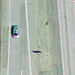

In [ ]:
index = 0
array_to_img(X_IMG_orig[index])

In [ ]:
XXIMGR = np.zeros((X_IMG_orig.shape[0], 224, 224, 3))
XXIMGD = np.zeros((X_IMG_orig.shape[0], 224, 224, 3))

for i in range(X_IMG_orig.shape[0]):
     XXIMGR[i] = prepare_image(array_to_img(X_IMG_orig[i]), target=(224,224), mode='caffe')
     XXIMGD[i] = prepare_image(array_to_img(X_IMG_orig[i]), target=(224,224), mode='torch')

print ("number of subimages = " + str(X_IMG_orig.shape[0]))
print ("X_IMG_orig shape: " + str(X_IMG_orig.shape))

print ("XXIMGR shape: " + str(XXIMGR.shape))
print ("XXIMGR shape: " + str(XXIMGD.shape))

number of subimages = 4489
X_IMG_orig shape: (4489, 75, 75, 3)
XXIMGR shape: (4489, 224, 224, 3)


In [ ]:
print ("XXIMGR shape: " + str(XXIMGR.shape))
print ("XXIMGD shape: " + str(XXIMGD.shape))

Rpretrained_model = ResNet50(include_top=True, weights='imagenet', input_shape=(224, 224, 3))
Rpretrained_model1 = models.Model(inputs=Rpretrained_model.input, outputs=Rpretrained_model.layers[-2].output)
print(Rpretrained_model1.summary())

Dpretrained_model = DenseNet169(include_top=True, weights='imagenet', input_shape=(224, 224, 3))
Dpretrained_model1 = models.Model(inputs=Dpretrained_model.input, outputs=Dpretrained_model.layers[-2].output)
print(Dpretrained_model1.summary())

PXXIMGR = Rpretrained_model1.predict(XXIMGR)
print('End ResNet prediction')
print("PXXIMGR Shape:", PXXIMGR.shape)

PXXIMGD = Dpretrained_model1.predict(XXIMGD)
print('End DenseNet prediction')
print("PXXIMGD Shape:", PXXIMGD.shape)

XXIMG = np.zeros((X_IMG_orig.shape[0],3712))
for i in range(X_IMG_orig.shape[0]):
     XXIMG[i] = np.concatenate((PXXIMGR[i], PXXIMGD[i]), axis=0)

print("XXIMG Shape:", XXIMG.shape)

XXIMGR shape: (4489, 224, 224, 3)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________

In [ ]:
#CI_Out = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/COutImageCls50S4.h5', 'w')
#OCI = CI_Out.create_dataset("CO4", np.shape(XXIMG), h5py.h5t.IEEE_F64BE, data=XXIMG)
#CI_Out.close()
#CI_Out1 = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/COutImageCls50S1.h5', 'r')
#S1 = np.array(CI_Out1["CO1"])
#CI_Out1.close()
#CI_Out2 = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/COutImageCls50S2.h5', 'r')
#S2 = np.array(CI_Out2["CO2"])
#CI_Out2.close()
#CI_Out3 = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/COutImageCls50S3.h5', 'r')
#S3 = np.array(CI_Out3["CO3"])
#CI_Out3.close()
#CI_Out4 = h5py.File('/content/drive/My Drive/Datasets/BImg/TMP/COutImageCls50S4.h5', 'r')
#S4 = np.array(CI_Out4["CO4"])
#CI_Out4.close()

#SSS = np.zeros((NI, 3712))
#SSS[0:2500,:] = S1
#SSS[2500:5000,:] = S2
#SSS[5000:7500,:] = S3
#SSS[7500:NI,:] = S4
#print("SSS: ",SSS.shape)

CI_Out = h5py.File('/content/drive/My Drive/Datasets/BImg/COutImageCls200.h5', 'w')
OCI = CI_Out.create_dataset("CO", np.shape(XXIMG), h5py.h5t.IEEE_F64BE, data=XXIMG)
CI_Out.close()

SSS:  (10000, 3712)


In [ ]:
CI_Out = h5py.File('/content/drive/My Drive/Datasets/BImg/COutImageCls200.h5', 'r')
OX = np.array(CI_Out["CO"])
CI_Out.close()

print(OX - XXIMG)

In [ ]:
#model = models.Sequential()
#model.add(layers.Input(shape = (3712)))
#model.add(layers.ReLU())
#model.add(layers.Dropout(0.88))
#model.add(layers.Dense(21, activation='softmax'))

#model.load_weights('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/ResDens_Wieghts.h5')

#model = models.load_model('/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/ResDens_model')

model = joblib.load('/content/drive/My Drive/Datasets/UCMerced_LandUse/Convout/TLB1000/ResDens_SVMmodel.pkl')

CI_Out = h5py.File('/content/drive/My Drive/Datasets/BImg/COutImageCls50.h5', 'r')
OX = np.array(CI_Out["CO"])
CI_Out.close()

#print(model.summary())

YOne = model.predict(OX)
print('YOne Shape: ', YOne.shape)
print('Prediction end')

YOne Shape:  (10000,)
Prediction end


In [ ]:
print(YOne)
print(OX)

[ 8  8  8 ... 11  2 18]
[[0.60138923 0.11001571 0.         ... 0.0339396  0.17223528 0.01074409]
 [0.96945363 0.00605215 0.         ... 0.06567027 0.29959649 0.0029286 ]
 [0.4153688  0.00275663 0.         ... 0.05581904 0.09030051 0.140543  ]
 ...
 [0.         0.39761531 0.01058092 ... 0.10974067 0.4058975  0.06094271]
 [0.03712954 0.12638396 0.02444793 ... 0.38334143 0.56872857 0.02031638]
 [0.15080403 0.3069537  0.         ... 0.08693303 0.90265197 0.14654876]]


In [ ]:
print(YOne.shape)
Y = np.zeros((NI))
YO = np.zeros((NI))

for i in range(YOne.shape[0]):
  #ky=np.argmax(YOne[i])
  #YO[i] = ky
  #Y[i] = getyv(ky=ky,DS='SW')
  Y[i] = getyv(ky=YOne[i],DS='UC')

print(YO)
print(Y)

OutCls = np.zeros((BIWH,BIWH,3))
k = 0
for i in range(0,BIWH,CIWH):
  for j in range(0,BIWH,CIWH):
    OutCls[i:i+CIWH,j:j+CIWH,:] = Out_Big_ArrImg(DS='BI1',y=Y[k],X=OutCls[i:i+CIWH,j:j+CIWH,:])
    k=k+1

OutImageCls = array_to_img(OutCls)
OutImageCls.save('/content/drive/My Drive/Datasets/BImg/SVMUCOutImageCls50.jpg')

(10000,)
[0. 0. 0. ... 0. 0. 0.]
[7. 7. 7. ... 4. 2. 1.]


In [ ]:
import pandas as pd

df1 = pd.DataFrame(Y)
df1.to_excel("/content/drive/My Drive/Y200.xlsx", sheet_name='Y200')
df2 = pd.DataFrame(YO)
df2.to_excel("/content/drive/My Drive/YO200.xlsx", sheet_name='YO200')